<a href="https://colab.research.google.com/github/youssef987sh/rt60/blob/main/tttttttt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

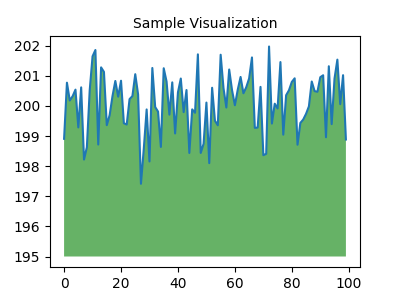

In [25]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.


In [26]:
!pip install langchain==0.1.4
!pip install langchain_community==0.0.16
!pip install langchain_openai==0.0.5
!pip install python-dotenv==1.0.1
!pip install streamlit==1.30.0
!pip install chromadb==0.4.22
!pip install beautifulsoup4==4.12.2

In [27]:
%%writefile app.py
import streamlit as st
from langchain_core.messages import AIMessage, HumanMessage
from langchain_community.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.chains import create_history_aware_retriever, create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

load_dotenv()
def get_vectorstore_from_url(url):
    # get the text in document form
    loader = WebBaseLoader(url)
    document = loader.load()

    # split the document into chunks
    text_splitter = RecursiveCharacterTextSplitter()
    document_chunks = text_splitter.split_documents(document)
def get_context_retriever_chain(vector_store):
    llm = ChatOpenAI()

    retriever = vector_store.as_retriever()
prompt = ChatPromptTemplate.from_messages([
      MessagesPlaceholder(variable_name="chat_history"),
      ("user", "{input}"),
      ("user", "Given the above conversation, generate a search query to look up in order to get information relevant to the conversation")
    ])
# file ipython-input-37-5d3e3072c343

def get_response(user_input):
    retriever_chain = get_context_retriever_chain(st.session_state.vector_store)
    conversation_rag_chain = get_conversational_rag_chain(retriever_chain)

    response = conversation_rag_chain.invoke({
        "chat_history": st.session_state.chat_history,
        "input": user_input
    })

    return response['answer']

# Indent the following code block
def get_conversational_rag_chain(retriever_chain):

    llm = ChatOpenAI()

    prompt = ChatPromptTemplate.from_messages([
      ("system", "Answer the user's questions based on the below context:\n\n{context}"),
      MessagesPlaceholder(variable_name="chat_history"),
      ("user", "{input}"),
    ])

    stuff_documents_chain = create_stuff_documents_chain(llm,prompt)

    return create_retrieval_chain(retriever_chain, stuff_documents_chain)

# app config
st.set_page_config(page_title="VK: Chat with websites", page_icon="🤖")
st.title("VK: Chat with websites")
#sidebar contents

with st.sidebar:
    st.title('🦜🔗VK - WEBSITE BASED LANG_GRAPH CHATBOT🤗')
    st.markdown('''
    ## About APP:

    The app's primary resource is utilised to create::

    - [streamlit](https://streamlit.io/)
    - [Langchain](https://docs.langchain.com/docs/)
    - [OpenAI](https://openai.com/)

    ## About me:

    - [Linkedin](https://www.linkedin.com/in/venkat-vk/)

    ''')
st.write('💡All about site based chatbot, created by VK🤗')

st.header("Settings")
website_url = st.text_input("Website URL")

if website_url is None or website_url == "":
    st.info("Please enter a website URL")
else:
    # session state
    if "chat_history" not in st.session_state:
        st.session_state.chat_history = [
            AIMessage(content="Hello, I am a bot. How can I help you?"),
        ]
    if "vector_store" not in st.session_state:
        st.session_state.vector_store = get_vectorstore_from_url(website_url)

# user input
    user_query = st.chat_input("Type your message here...")
    if user_query is not None and user_query != "":
        response = get_response(user_query)
        st.session_state.chat_history.append(HumanMessage(content=user_query))
        st.session_state.chat_history.append(AIMessage(content=response))
# conversation
    for message in st.session_state.chat_history:
        if isinstance(message, AIMessage):
            with st.chat_message("AI"):
                st.write(message.content)
        elif isinstance(message, HumanMessage):
            with st.chat_message("Human"):
                st.write(message.content)

Writing app.py


In [28]:
!wget -q -O - ipv4.icanhazip.com

34.106.172.21


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.172.21:8501

npx: installed 22 in 2.662s
your url is: https://dark-women-brake.loca.lt
2024-07-02 18:20:54.894 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 98, in <module>
    response = get_response(user_query)
  File "/content/app.py", line 33, in get_response
    retriever_chain = get_context_retriever_chain(st.session_state.vector_store)
  File "/content/app.py", line 22, in get_context_retriever_chain
    llm = ChatOpenAI()
  File "/usr/local/lib/python3.10/dist-packages/langchain_core/load/serializable.py", line 107, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib